In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('placement.csv')

In [11]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [13]:
df.sample(5)

,cgpa,package
31,8.10,3.89
10,5.32,1.86
69,7.30,2.94
130,6.68,2.49
74,6.85,3.44


In [15]:
df.shape

(200, 2)

In [17]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [19]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.corr()['cgpa']

cgpa       1.000000
package    0.880692
Name: cgpa, dtype: float64

Text(0, 0.5, 'Package(in lpa)')

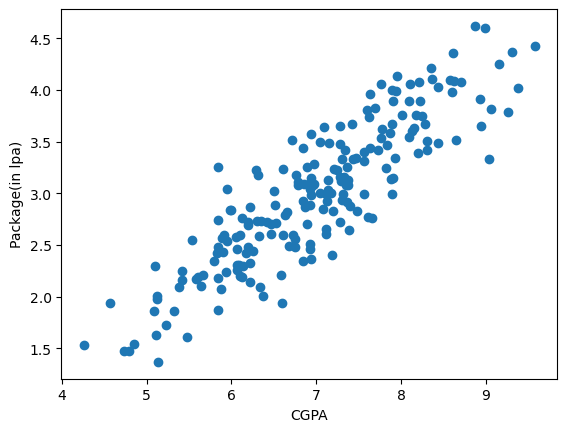

In [25]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [27]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [29]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [31]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
X_train,X_test,y_train,y_test

(     cgpa
 137  7.14
 163  8.93
 111  5.42
 123  5.10
 109  7.77
 ..    ...
 43   7.66
 22   6.14
 72   7.78
 15   7.25
 168  8.65
 
 [160 rows x 1 columns],
      cgpa
 112  8.58
 29   7.15
 182  5.88
 199  6.22
 193  4.57
 85   4.79
 10   5.32
 54   6.86
 115  8.35
 35   6.87
 12   8.94
 92   7.90
 13   6.93
 126  5.91
 174  7.32
 2    7.82
 44   5.09
 3    7.42
 113  6.94
 14   7.73
 23   6.19
 25   7.28
 6    6.73
 134  7.20
 165  8.21
 173  6.75
 45   7.87
 65   7.60
 48   8.63
 122  5.12
 178  8.15
 64   7.36
 9    8.31
 57   6.60
 78   6.59
 71   7.47
 128  7.93
 176  6.29
 131  6.37
 53   6.47,
 137    3.13
 163    3.91
 111    2.25
 123    2.30
 109    4.06
        ... 
 43     2.76
 22     2.30
 72     3.62
 15     3.23
 168    3.52
 Name: package, Length: 160, dtype: float64,
 112    4.10
 29     3.49
 182    2.08
 199    2.33
 193    1.94
 85     1.48
 10     1.86
 54     3.09
 115    4.21
 35     2.87
 12     3.65
 92     4.00
 13     2.89
 126    2.60
 174    2.99
 2    

In [37]:
X_test.head()

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [40]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(X_test)

In [48]:
lr.predict(X_test.iloc[10].values.reshape(1,1))

/Users/samarthpatil/miniconda3/envs/dsenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.09197872])

In [50]:
# Make predictions on test set
y_pred = lr.predict(X_test)

# Create DataFrame for comparison
results = pd.DataFrame({
    "CGPA": X_test.values.flatten(),
    "Actual Package": y_test.values,
    "Predicted Package": y_pred
})

print(results.head(10))  # show first 10 rows


   CGPA  Actual Package  Predicted Package
0  8.58            4.10           3.891116
1  7.15            3.49           3.093245
2  5.88            2.08           2.384646
3  6.22            2.33           2.574349
4  4.57            1.94           1.653729
5  4.79            1.48           1.776478
6  5.32            1.86           2.072193
7  6.86            3.09           2.931439
8  8.35            4.21           3.762787
9  6.87            2.87           2.937018


Text(0, 0.5, 'Package(in lpa)')

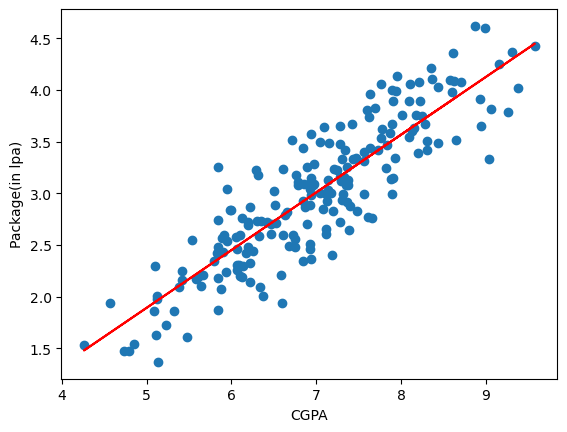

In [52]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

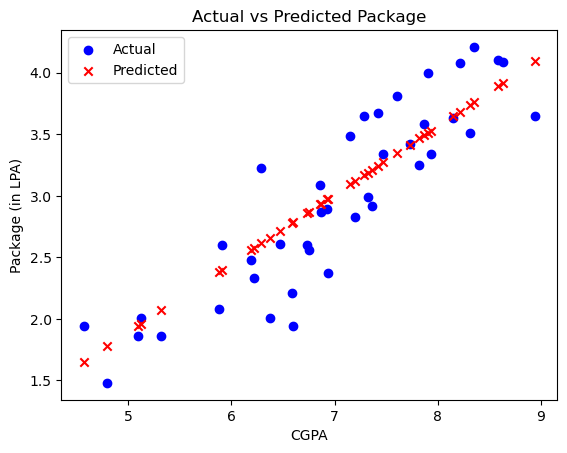

In [54]:
# Scatter Plot for Actual vs Predicted
plt.scatter(results["CGPA"], results["Actual Package"], color="blue", label="Actual")
plt.scatter(results["CGPA"], results["Predicted Package"], color="red", marker="x", label="Predicted")
plt.xlabel("CGPA")
plt.ylabel("Package (in LPA)")
plt.title("Actual vs Predicted Package")
plt.legend()
plt.show()
